In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA



- ### <a link ="" ></a> Data Visualisations and Analysis

In [2]:
df = pd.read_csv('data/IMDb Movies India.csv', encoding='latin1')


In [3]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
# convert votes column to numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [6]:
#delete ( and ) from year column
df['Year'] = df['Year'].str.replace('(', '')
df['Year'] = df['Year'].str.replace(')', '')


In [7]:
#delete min from duration column
df['Duration'] = df['Duration'].str.replace(' min','')


In [8]:
#convert year and duration columns to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [9]:
df['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [10]:
#checking duplicates and deleting them

df.duplicated().sum()


6

In [11]:
#extract only the text part from the name column
df['Name'] = df['Name'].str.extract('([a-zA-Z ]+)', expand=False)

#spliting the genre column wtih , 
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre')
# Convert 'Votes' to numeric and replace the , to keep only numerical part
df['Name'] = df['Name'].astype(str)
df['Name'] = df['Name'].str.extract('([a-zA-Z ]+)', expand=False)



In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [13]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 24941 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      24941 non-null  object 
 1   Year      24197 non-null  float64
 2   Duration  14165 non-null  float64
 3   Genre     23065 non-null  object 
 4   Rating    15837 non-null  float64
 5   Votes     12331 non-null  float64
 6   Director  24400 non-null  object 
 7   Actor 1   23160 non-null  object 
 8   Actor 2   22274 non-null  object 
 9   Actor 3   21423 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.1+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Gadhvi,2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Homecoming,2021.0,90.0,Drama,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,Homecoming,2021.0,90.0,Musical,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Yaaram,2019.0,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019.0,110.0,Romance,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,Aur Pyaar Ho Gaya,1997.0,147.0,Comedy,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997.0,147.0,Drama,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997.0,147.0,Musical,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [14]:
#what is the object type ?

In [15]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Gadhvi,2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Homecoming,2021.0,90.0,Drama,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,Homecoming,2021.0,90.0,Musical,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Yaaram,2019.0,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019.0,110.0,Romance,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,Aur Pyaar Ho Gaya,1997.0,147.0,Comedy,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997.0,147.0,Drama,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997.0,147.0,Musical,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [16]:
df.describe()

,Year,Duration,Rating,Votes
count,24197.000000,14165.000000,15837.000000,12331.000000
mean,1989.279332,131.594564,5.824228,142.855324
std,23.967451,28.134745,1.367065,210.870949
min,1913.000000,2.000000,1.100000,5.000000
25%,1972.000000,116.000000,4.900000,16.000000
50%,1993.000000,135.000000,6.000000,45.000000
75%,2010.000000,150.000000,6.800000,165.000000
max,2022.000000,321.000000,10.000000,999.000000


In [17]:
df.isna().sum()

Name            0
Year          744
Duration    10776
Genre        1876
Rating       9104
Votes       12610
Director      541
Actor 1      1781
Actor 2      2667
Actor 3      3518
dtype: int64

C:\Users\Amir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


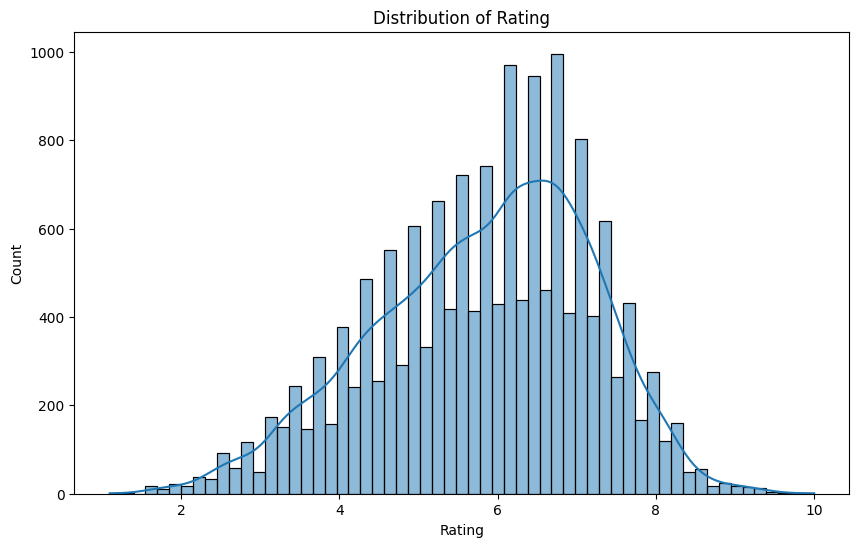

In [18]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Rating')
plt.show()


C:\Users\Amir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


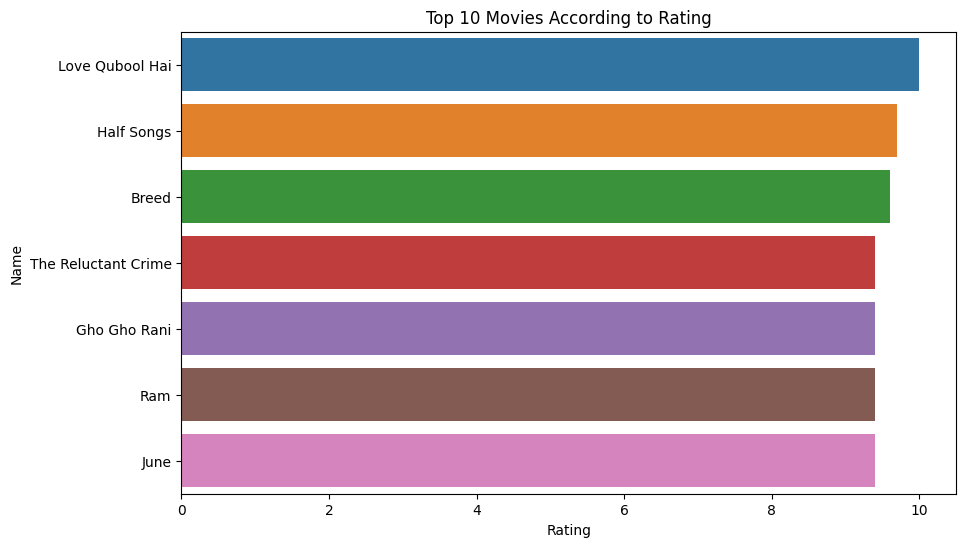

In [19]:
# plot top 10 movies according to rating per year and overall
plt.figure(figsize=(10, 6))
top_10_movies = df.sort_values('Rating', ascending=False).head(10)
sns.barplot(x='Rating', y='Name', data=top_10_movies)
plt.title('Top 10 Movies According to Rating')
plt.show()

In [20]:
#imputing missing values with mean
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Votes'].fillna(df['Votes'].mean(), inplace=True)
df['Year'].fillna(df['Year'].mean(), inplace=True)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

df.isna().sum()

#drop rows with missing values
df.dropna(inplace=True)

df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [21]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1989.279332,131.594564,Drama,5.824228,142.855324,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Gadhvi,2019.000000,109.000000,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Homecoming,2021.000000,90.000000,Drama,5.824228,142.855324,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,Homecoming,2021.000000,90.000000,Musical,5.824228,142.855324,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Yaaram,2019.000000,110.000000,Comedy,4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019.000000,110.000000,Romance,4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,And Once Again,2010.000000,105.000000,Drama,5.824228,142.855324,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,Aur Pyaar Ho Gaya,1997.000000,147.000000,Comedy,4.700000,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997.000000,147.000000,Drama,4.700000,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997.000000,147.000000,Musical,4.700000,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [22]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [23]:
#encoding the categorical variables
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)


In [32]:
#splitting the data into features and target variable
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# checking the shape of the train and test data
print(X_train.shape, X_test.shape)

(16341, 8) (4086, 8)


## data cleaning

In [37]:
#Setting up the models
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


models = [
    Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor())
    ]),
    Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor())
    ]),

    Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ]),
],

Models_names = ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor', 'Ridge']


In [38]:
#Training the models
for model, model_name in zip(models[0], Models_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} Mean Squared Error: {mse}')
    print(f'{model_name} R2 Score: {r2}')
    print('\n')

#Cross validation
for model, model_name in zip(models[0], Models_names):
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print(f'{model_name} Cross Validation R2 Score: {cv_results.mean()}')
    print('\n')


LinearRegression Mean Squared Error: 0.3969969039680245
LinearRegression R2 Score: 0.7132495083099


RandomForestRegressor Mean Squared Error: 0.1316266838157999
RandomForestRegressor R2 Score: 0.9049261696339124


GradientBoostingRegressor Mean Squared Error: 0.3359819885462909
GradientBoostingRegressor R2 Score: 0.7573205245388355


Lasso Mean Squared Error: 1.384989598128063
Lasso R2 Score: -0.00037668878365804126


Ridge Mean Squared Error: 0.3969977396606475
Ridge R2 Score: 0.7132489046899015


LinearRegression Cross Validation R2 Score: 0.7151572075198918


RandomForestRegressor Cross Validation R2 Score: 0.923527308828983


GradientBoostingRegressor Cross Validation R2 Score: 0.7599456567661419


Lasso Cross Validation R2 Score: -0.0004317369897944845


Ridge Cross Validation R2 Score: 0.7151572323240629




In [ ]:
#the best